In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

sns.set(style="whitegrid")

csv_path = "wandb_data/init_std_sweep/"

In [3]:
df1 = pd.read_csv(csv_path + "init_std_sweep__0_5__big.csv")
df2 = pd.read_csv(csv_path + "init_std_sweep__0_5__small.csv")
df3 = pd.read_csv(csv_path + "init_std_sweep__0_5__medium.csv")
df4 = pd.read_csv(csv_path + "init_std_sweep__6_7__medium.csv")
df5 = pd.read_csv(csv_path + "init_std_sweep__8_9__medium.csv")
df = pd.concat([df3, df4, df5], ignore_index=True)

In [4]:
df.head()

,Name,noisy_layer_init_std,mean_regret,seed,env_id,_wandb
0,conbandit_combi1_0__5__2025-06-16_19-10,1.0,112.917168,5,NNBandit-v0,NaN
1,conbandit_combi1_0__4__2025-06-16_19-10,1.0,125.387634,4,NNBandit-v0,NaN
2,conbandit_combi1_0__3__2025-06-16_19-10,1.0,135.083832,3,NNBandit-v0,NaN
3,conbandit_combi1_0__2__2025-06-16_19-09,1.0,104.205498,2,NNBandit-v0,NaN
4,conbandit_combi1_0__1__2025-06-16_19-09,1.0,104.491920,1,NNBandit-v0,NaN


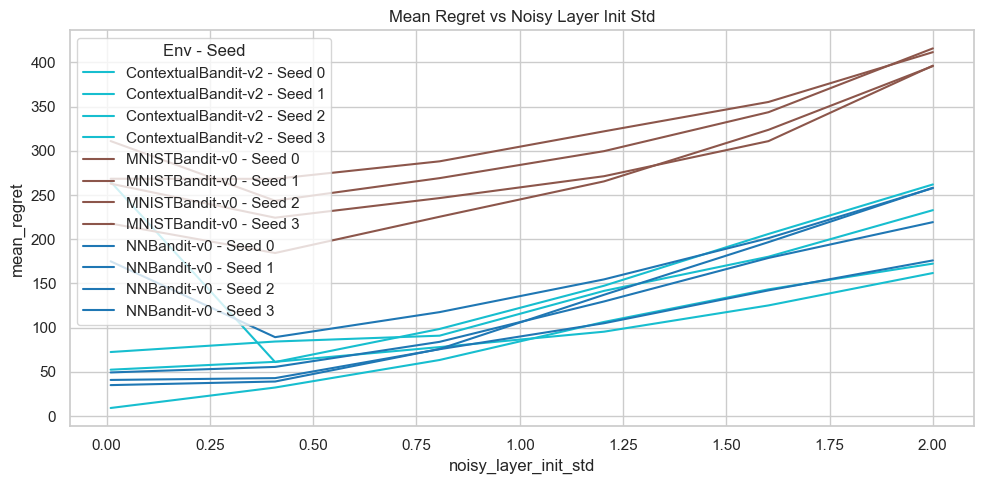

In [5]:
x_name = 'noisy_layer_init_std'
y_name = 'mean_regret'

envs = df['env_id'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(envs)))
color_map = dict(zip(envs, colors))

plt.figure(figsize=(10, 5))

for (env, seed), group_df in df1.groupby(['env_id', 'seed']):
    plt.plot(group_df[x_name],group_df[y_name],label=f'{env} - Seed {seed}',color=color_map[env])

plt.title('Mean Regret vs Noisy Layer Init Std')
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.grid(True)
plt.legend(title='Env - Seed', loc='upper left')
plt.tight_layout()
plt.show()

In [1]:
plt.figure(figsize=(10, 7))

sns.lineplot(
    data=df,
    x='noisy_layer_init_std',
    y='mean_regret',
    hue='env_id',
    errorbar='sd',
    palette='colorblind'
)

xticks = np.arange(0,
                   df['noisy_layer_init_std'].max() + 0.1,
                   0.1)
plt.xticks(xticks)
# plt.set_xticks(range(

plt.title('Mean Regret vs Noisy Layer Init Std (±1 std)')
plt.xlabel('noisy_layer_init_std')
plt.ylabel('mean_regret')
plt.grid(True)
plt.legend(title='Environment', loc='center right')
plt.tight_layout()

plt.savefig("mean_regret_vs_noisy_std.png", dpi=300, bbox_inches='tight')

plt.show()

NameError: name 'plt' is not defined

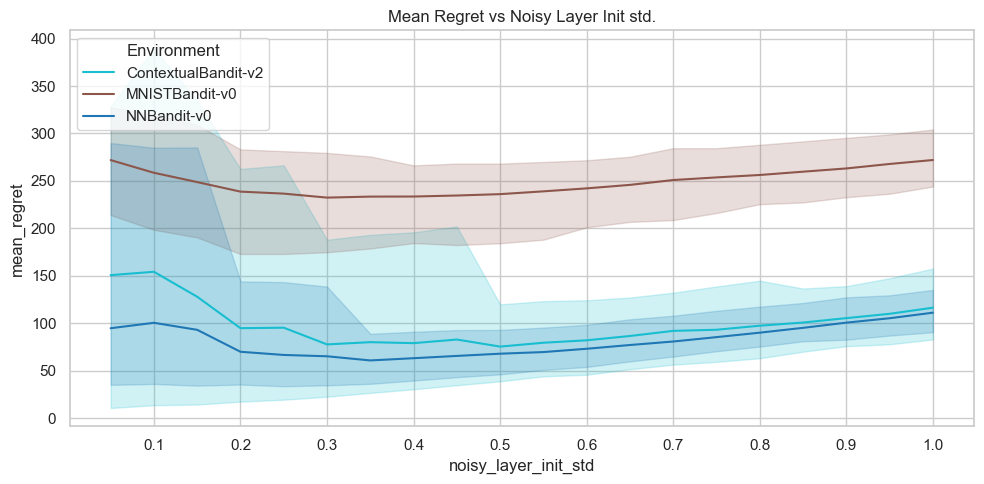

In [83]:
agg_df = df.groupby(['env_id', 'noisy_layer_init_std']).agg(
    mean_regret=('mean_regret', 'mean'),
    min_regret=('mean_regret', 'min'),
    max_regret=('mean_regret', 'max')
).reset_index()

plt.figure(figsize=(10, 5))

xticks = np.arange(0,
                   df['noisy_layer_init_std'].max() + 0.1,
                   0.1)
plt.xticks(xticks)

for env, group_df in agg_df.groupby('env_id'):
    group_df = group_df.sort_values('noisy_layer_init_std')
    
    plt.plot(group_df['noisy_layer_init_std'], group_df['mean_regret'],
             label=env, color=color_map[env])
    
    plt.fill_between(group_df['noisy_layer_init_std'],
                     group_df['min_regret'],
                     group_df['max_regret'],
                     color=color_map[env],
                     alpha=0.2)

plt.title('Mean Regret vs Noisy Layer Init std.')
plt.xlabel('noisy_layer_init_std')
plt.ylabel('mean_regret')
plt.grid(True)
plt.legend(title='Environment', loc='upper left')
plt.tight_layout()
plt.show()